In [1]:
import numpy as np
import warnings
import keras
from skimage import data, io, filters

from keras.models import Sequential
from keras.layers import Flatten, Dense, Input, Dropout
from keras.layers import Conv2D, ZeroPadding2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import GlobalAveragePooling2D
from keras.optimizers import SGD
from keras import backend as K

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
npzfile = np.load('../data/image_data_50.npz')
X = npzfile['arr_0']
y = npzfile['arr_1']

In [3]:
batch_size = 200
num_classes = len(np.unique(y))
input_shape = X.shape[1:]
epochs = 100

0


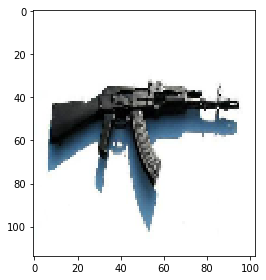

In [16]:
%matplotlib inline
tmp = X[20]
print(y[4])
io.imshow(tmp)

In [24]:
# split into train and test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [31]:
def VGG11(input_shape, num_classes):
    
    if K.image_data_format() == 'channels_first':
        input_shape = input_shape[::-1]
    else:
        print(input_shape)
        input_shape = input_shape

    model = Sequential()

    # Block 1
    model.add(ZeroPadding2D((1, 1), input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu', name='block1_conv1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(64, (3, 3), activation='relu', name='block1_conv2'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool'))
    
    # Block 2
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(128, (3, 3), activation='relu', name='block2_conv1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(128, (3, 3), activation='relu', name='block2_conv2'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool'))
    
    # Block 3
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(256, (3, 3), activation='relu', name='block3_conv1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(256, (3, 3), activation='relu', name='block3_conv2'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool'))
    
    # Block 4
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(512, (3, 3), activation='relu', name='block4_conv1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(512, (3, 3), activation='relu', name='block4_conv2'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool'))
     
    # Block 5
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(512, (3, 3), activation='relu', name='block5_conv1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Conv2D(512, (3, 3), activation='relu', name='block5_conv2'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool'))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

In [32]:
model = VGG11(input_shape, num_classes)

(114, 103, 3)


In [33]:
#sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)

# Let's train the model using RMSprop
sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [34]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [35]:
tbCallBack = keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=True, write_images=True)

In [36]:
model.fit(x_train, y_train, 
          callbacks=[tbCallBack],
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)

Train on 4601 samples, validate on 1151 samples
Epoch 1/100
4601/4601 [==============================] - 59s - loss: 3.9314 - acc: 0.0278 - val_loss: 3.9309 - val_acc: 0.0400

KeyboardInterrupt: 